### import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### csv_read : 매 달 별로 각각 read

In [30]:
card_01 = pd.read_csv("card_202001.csv")
card_02 = pd.read_csv("card_202002.csv")
card_03 = pd.read_csv("card_202003.csv")
card_04 = pd.read_csv("card_202004.csv")
card_05 = pd.read_csv("card_202005.csv")
card_06 = pd.read_csv("card_202006.csv")

card_01.head()
card_05.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200501,1150055000,화곡2동,8302,정 육 점,17,481200
1,20200501,1121582000,자양1동,8021,스넥,188,2777400
2,20200501,1156060500,문래동,6140,주 차 장,63,375000
3,20200501,1162068500,신사동,8006,서양음식,406,3421500
4,20200501,1120066000,성수1가2동,6140,주 차 장,37,259500


receipt_dttm <br>
adstrd_code <br>
adstrd_nm <br>
mrhst_induty_cl_code <br>
mrhst_induty_cl_nm <br>
selng_cascnt <br>
salamt <br>

### 월 별 카드 사용량 변화 확인

In [4]:
total_month = [len(card_01["salamt"]), len(card_02["salamt"]), len(card_03["salamt"]), len(card_04["salamt"]), len(card_05["salamt"]), len(card_06["salamt"]),]
total_month

[387134, 562644, 797233, 792878, 850301, 387457]

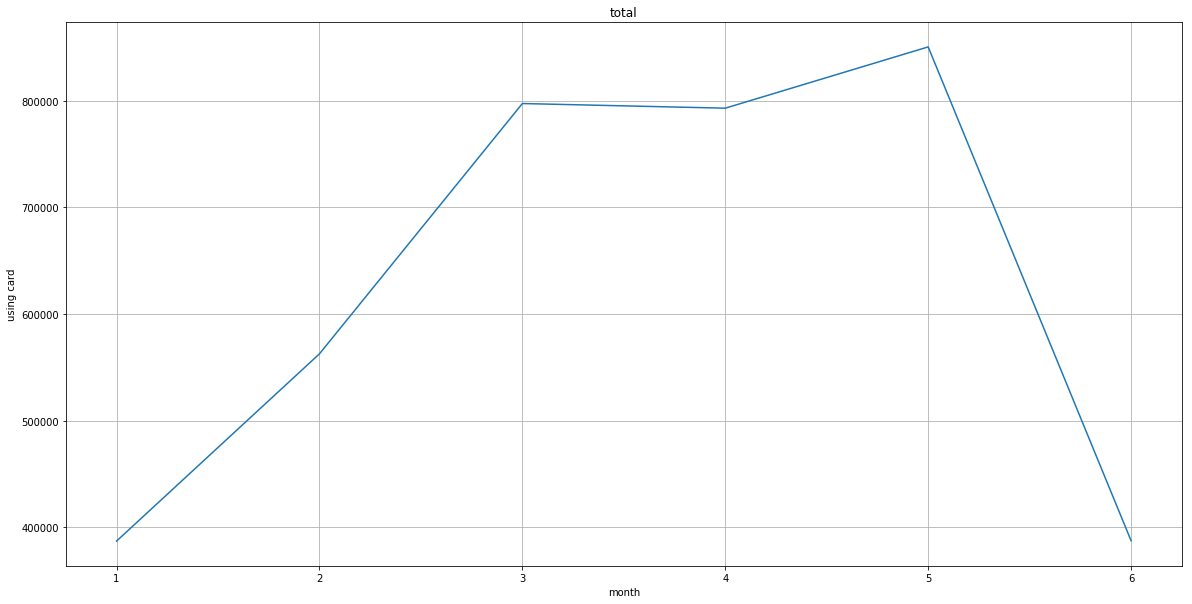

In [5]:
data = range(1, 7)
plt.figure(figsize=(20, 10))
plt.plot(data, total_month)
plt.title("total")
plt.xlabel("month")
plt.ylabel("using card")
plt.grid()
plt.show()

### 월별 일평균 카드 사용량 변화 확인

[13826.214285714286, 19401.51724137931, 25717.1935483871, 26429.266666666666, 27429.064516129034, 27675.5]


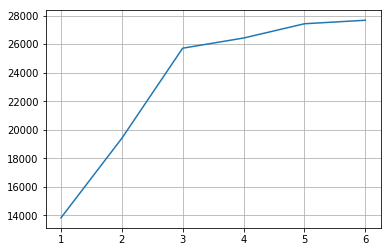

In [14]:
total_month
month = [28, 29, 31, 30, 31, 14]
mean_month = []
for i in range(0, 6) :
    mean_month.append(total_month[i]/month[i])

print(mean_month)
plt.plot(range(1, 7), mean_month)
plt.grid()
plt.show()

1월 : 4일 - 31일 = 총 28일 <br>
2월 : 1일 - 29일 = 총 29일 <br>
3월 : 1일 - 31일 = 총 31일 <br>
4월 : 1일 - 30일 = 총 30일 <br>
5월 : 1일 - 31일 = 총 31일 <br>
6월 : 1일 - 14일 = 총 14일 <br>
<br>
일별 평균 카드 사용 횟수는 오히려 더 증가했음을 확인 가능

### seaborn : countplot을 이용한 한 달의 카드 사용량

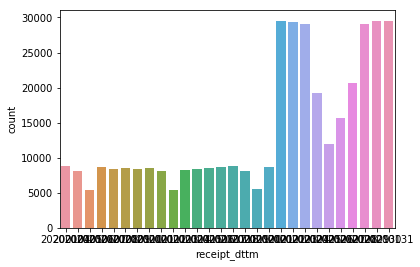

<Figure size 1440x720 with 0 Axes>

In [6]:
sn.countplot(x = 'receipt_dttm', data = card_01)
plt.figure(figsize=(20, 10))
plt.show()

### Seaborn : countplot을 이용한, 한 달 내 카테고리 별 카드 사용 횟수

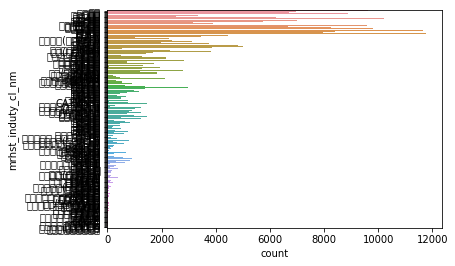

In [19]:
sn.countplot(y = 'mrhst_induty_cl_nm', data = card_01)

### Pandas : 월 별 최대 카드 사용 카테고리 10항목, 최소 카드 사용 카테고리 10항목 추출

#### 1월

In [60]:
count1 = card_01['mrhst_induty_cl_nm'].value_counts()
count1.sort_values()
print(count1)

일반한식           11771
서양음식           11647
스넥             11391
편 의 점          11314
미 용 원          10773
슈퍼 마켓          10215
주점              9970
제과점             9814
약국              9604
기타음료식품          9577
의원              8890
중국음식            8388
정 육 점           8243
일식회집            7960
노래방             6989
치과의원            6956
기타레져업           6745
한의원             6713
농축수산품           6652
정장              6210
화 장 품           6037
당구장             5757
세탁소             5409
유아원             5006
안경              4838
주 차 장           4469
자동차정비           4168
문구용 품           3920
스포츠레져용품         3912
기타잡화            3854
               ...  
일반백화점             25
농기계               25
통신서비스             23
여 객 선             21
철   도             20
혼수전문점             20
통신서비스/비대상         19
통신판매(일반)          19
종합레져타운            16
피아노대리점            15
비씨카드정산용(할인)       14
자체물품대금            14
외국인전용가맹점          14
사업자미등록개인          14
통신판매2             13
기타농업관련            11
위성방송         

11771 1


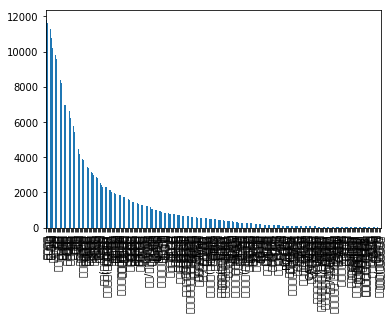

In [61]:
print(max(count1), min(count1))
count1.plot(kind = 'bar')

In [94]:
mon_max_01 = []
mon_max_01_idx = []
mon_min_01 = []
mon_min_01_idx = []

for i in range(0, 20):
    mon_max_01.append(count1[i])
    mon_max_01_idx.append(count1.index[i])
    mon_min_01.append(count1[-(i+1)])
    mon_min_01_idx.append(count1.index[-(i+1)])

    
print(mon_max_01, "\n", mon_max_01_idx)
print(mon_min_01, "\n", mon_min_01_idx)

print('\n\n')

mon_min_01.reverse(), mon_min_01_idx.reverse()
mon_01 = mon_max_01 + mon_min_01
mon_01_idx = mon_max_01_idx + mon_min_01_idx

print(mon_01,'\n', mon_01_idx)

[11771, 11647, 11391, 11314, 10773, 10215, 9970, 9814, 9604, 9577, 8890, 8388, 8243, 7960, 6989, 6956, 6745, 6713, 6652, 6210] 
 ['일반한식', '서양음식', '스넥', '편 의 점', '미 용 원', '슈퍼 마켓', '주점', '제과점', '약국', '기타음료식품', '의원', '중국음식', '정 육 점', '일식회집', '노래방', '치과의원', '기타레져업', '한의원', '농축수산품', '정장']
[1, 2, 5, 5, 6, 6, 6, 7, 7, 8, 8, 8, 8, 11, 11, 13, 14, 14, 14, 14] 
 ['통신기기무이자할부', '통신판매(생활서비스)', '교육테이프', '기타 운송', '골동품 점', '콘   도', '기타비영리유통', '조산원', '중장비수리', '카지노', '스 키 장', '기타회원제형태업소5', '기타회원제형태업소2', '위성방송', '기타농업관련', '통신판매2', '사업자미등록개인', '외국인전용가맹점', '자체물품대금', '비씨카드정산용(할인)']



[11771, 11647, 11391, 11314, 10773, 10215, 9970, 9814, 9604, 9577, 8890, 8388, 8243, 7960, 6989, 6956, 6745, 6713, 6652, 6210, 14, 14, 14, 14, 13, 11, 11, 8, 8, 8, 8, 7, 7, 6, 6, 6, 5, 5, 2, 1] 
 ['일반한식', '서양음식', '스넥', '편 의 점', '미 용 원', '슈퍼 마켓', '주점', '제과점', '약국', '기타음료식품', '의원', '중국음식', '정 육 점', '일식회집', '노래방', '치과의원', '기타레져업', '한의원', '농축수산품', '정장', '비씨카드정산용(할인)', '자체물품대금', '외국인전용가맹점', '사업자미등록개인', '통신판매2', '기타농업관련', '위성방송', '기

      Name  Count
0     일반한식  11771
1     서양음식  11647
2       스넥  11391
3    편 의 점  11314
4    미 용 원  10773
5    슈퍼 마켓  10215
6       주점   9970
7      제과점   9814
8       약국   9604
9   기타음료식품   9577
10      의원   8890
11    중국음식   8388
12   정 육 점   8243
13    일식회집   7960
14     노래방   6989
15    치과의원   6956
16   기타레져업   6745
17     한의원   6713
18   농축수산품   6652
19      정장   6210


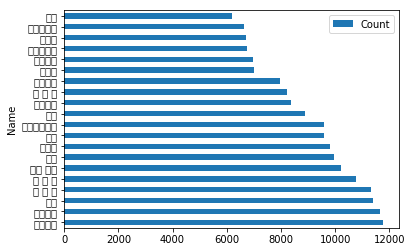

           Name  Count
0   비씨카드정산용(할인)     14
1        자체물품대금     14
2      외국인전용가맹점     14
3      사업자미등록개인     14
4         통신판매2     13
5        기타농업관련     11
6          위성방송     11
7    기타회원제형태업소2      8
8    기타회원제형태업소5      8
9         스 키 장      8
10          카지노      8
11        중장비수리      7
12          조산원      7
13      기타비영리유통      6
14        콘   도      6
15        골동품 점      6
16        기타 운송      5
17        교육테이프      5
18  통신판매(생활서비스)      2
19    통신기기무이자할부      1


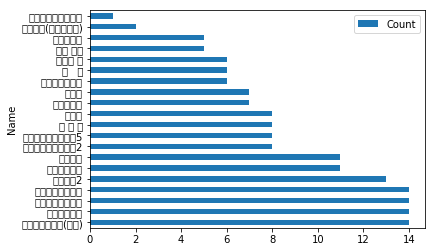

In [95]:
data01_max ={ "Name" : mon_max_01_idx, "Count" : mon_max_01 }
df_data01_max = pd.DataFrame(data01_max)
print(df_data01_max)
df_data01_max.plot(x = "Name", y = "Count", kind = 'barh')
plt.show()

data01_min = { "Name" : mon_min_01_idx, "Count" : mon_min_01 }
df_data01_min = pd.DataFrame(data01_min)
print(df_data01_min)
df_data01_min.plot(x = "Name", y = "Count", kind = 'barh')
plt.show()

### 6월(14일) 의 카드 사용량 변화 (test)

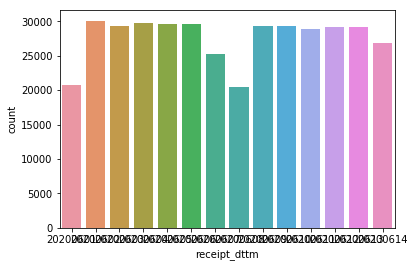

<Figure size 1440x720 with 0 Axes>

In [16]:
sns_card6 = sn.countplot(x = 'receipt_dttm', data = card_06)
plt.figure(figsize=(20, 10))
plt.show()

#### 2월

In [105]:
count2 = card_02['mrhst_induty_cl_nm'].value_counts()
count2.sort_values()
print(count2)

편 의 점             8897
서양음식              8891
일반한식              8876
스넥                8846
슈퍼 마켓             8823
미 용 원             8772
제과점               8718
기타음료식품            8693
약국                8626
주점                8564
중국음식              8521
정 육 점             8476
의원                8175
일식회집              8171
농축수산품             7889
기타레져업             7887
한의원               7845
치과의원              7631
노래방               7541
안경                7518
세탁소               7518
화 장 품             7505
당구장               7485
정장                7466
문구용 품             7051
유아원               7040
화   원             6676
기타잡화              6418
자동차정비             6294
스포츠레져용품           6180
                  ... 
통신서비스               53
일반백화점               53
전자상거래 상품권           51
통신서비스/비대상           46
통신판매(일반)            45
혼수전문점               44
CATV                43
통신판매2               43
종합레져타운              40
피아노대리점              39
전자상거래 상품권 전문판매      38
철   도               37
사업자미등록개인   

8897 1


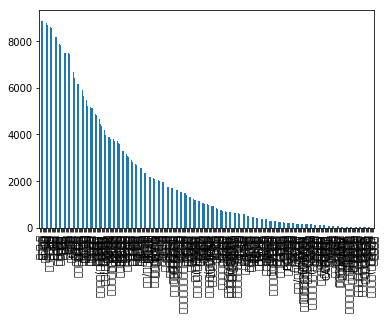

In [107]:
print(max(count2), min(count2))
count2.plot(kind = 'bar')

In [108]:
mon_max_02 = []
mon_max_02_idx = []
mon_min_02 = []
mon_min_02_idx = []

for i in range(0, 20):
    mon_max_02.append(count2[i])
    mon_max_02_idx.append(count2.index[i])
    mon_min_02.append(count2[-(i+1)])
    mon_min_02_idx.append(count2.index[-(i+1)])

    
print(mon_max_02, "\n", mon_max_02_idx)
print(mon_min_02, "\n", mon_min_02_idx)

print('\n\n')

mon_min_02.reverse(), mon_min_02_idx.reverse()
mon_02 = mon_max_02 + mon_min_02
mon_02_idx = mon_max_02_idx + mon_min_02_idx

print(mon_02,'\n', mon_02_idx)

[8897, 8891, 8876, 8846, 8823, 8772, 8718, 8693, 8626, 8564, 8521, 8476, 8175, 8171, 7889, 7887, 7845, 7631, 7541, 7518] 
 ['편 의 점', '서양음식', '일반한식', '스넥', '슈퍼 마켓', '미 용 원', '제과점', '기타음료식품', '약국', '주점', '중국음식', '정 육 점', '의원', '일식회집', '농축수산품', '기타레져업', '한의원', '치과의원', '노래방', '안경']
[1, 2, 3, 8, 9, 10, 11, 16, 17, 20, 20, 21, 22, 24, 25, 27, 29, 30, 37, 38] 
 ['택시회사', '총포류판매', '통신판매(생활서비스)', '교육테이프', '스 키 장', '콘   도', '조산원', '외국인전용가맹점', '기타비영리유통', '기타회원제형태업소5', '중장비수리', '위성방송', '기타회원제형태업소2', '기타 운송', '골동품 점', '자체물품대금', '기타농업관련', '사업자미등록개인', '철   도', '전자상거래 상품권 전문판매']



[8897, 8891, 8876, 8846, 8823, 8772, 8718, 8693, 8626, 8564, 8521, 8476, 8175, 8171, 7889, 7887, 7845, 7631, 7541, 7518, 38, 37, 30, 29, 27, 25, 24, 22, 21, 20, 20, 17, 16, 11, 10, 9, 8, 3, 2, 1] 
 ['편 의 점', '서양음식', '일반한식', '스넥', '슈퍼 마켓', '미 용 원', '제과점', '기타음료식품', '약국', '주점', '중국음식', '정 육 점', '의원', '일식회집', '농축수산품', '기타레져업', '한의원', '치과의원', '노래방', '안경', '전자상거래 상품권 전문판매', '철   도', '사업자미등록개인', '기타농업관련', '자체물품대금', '골동품 점', '기타 운송

      Name  Count
0    편 의 점   8897
1     서양음식   8891
2     일반한식   8876
3       스넥   8846
4    슈퍼 마켓   8823
5    미 용 원   8772
6      제과점   8718
7   기타음료식품   8693
8       약국   8626
9       주점   8564
10    중국음식   8521
11   정 육 점   8476
12      의원   8175
13    일식회집   8171
14   농축수산품   7889
15   기타레져업   7887
16     한의원   7845
17    치과의원   7631
18     노래방   7541
19      안경   7518


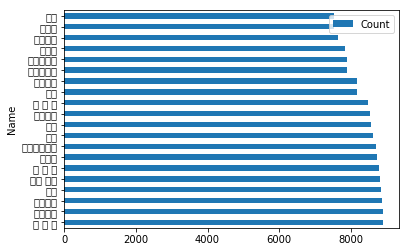

              Name  Count
0   전자상거래 상품권 전문판매     38
1            철   도     37
2         사업자미등록개인     30
3           기타농업관련     29
4           자체물품대금     27
5            골동품 점     25
6            기타 운송     24
7       기타회원제형태업소2     22
8             위성방송     21
9            중장비수리     20
10      기타회원제형태업소5     20
11         기타비영리유통     17
12        외국인전용가맹점     16
13             조산원     11
14           콘   도     10
15           스 키 장      9
16           교육테이프      8
17     통신판매(생활서비스)      3
18           총포류판매      2
19            택시회사      1


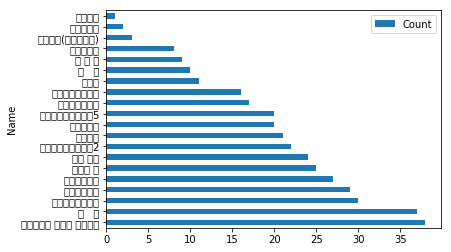

In [109]:
data02_max ={ "Name" : mon_max_02_idx, "Count" : mon_max_02 }
df_data02_max = pd.DataFrame(data02_max)
print(df_data02_max)
df_data02_max.plot(x = "Name", y = "Count", kind = 'barh')
plt.show()

data02_min = { "Name" : mon_min_02_idx, "Count" : mon_min_02 }
df_data02_min = pd.DataFrame(data02_min)
print(df_data02_min)
df_data02_min.plot(x = "Name", y = "Count", kind = 'barh')
plt.show()

#### 3월

In [112]:
count3 = card_03['mrhst_induty_cl_nm'].value_counts()
count3.sort_values()
print(count3)

편 의 점             13132
서양음식              13118
일반한식              13101
스넥                13063
슈퍼 마켓             13000
미 용 원             12984
제과점               12876
기타음료식품            12824
약국                12818
주점                12607
중국음식              12563
정 육 점             12524
일식회집              12030
의원                11873
농축수산품             11708
기타레져업             11480
한의원               11400
세탁소               11031
당구장               10988
치과의원              10984
정장                10946
안경                10908
화 장 품             10780
문구용 품             10342
화   원             10240
노래방               10192
기타잡화               9341
스포츠레져용품            9311
자동차정비              9197
동물병원               9119
                  ...  
통신판매(일반)             70
농축수산가공품              69
통신서비스                68
CATV                 66
혼수전문점                62
기타농업관련               62
통신서비스/비대상            61
전자상거래 상품권 전문판매       56
종합레져타운               56
철   도                53
통신판매2           

13132 2


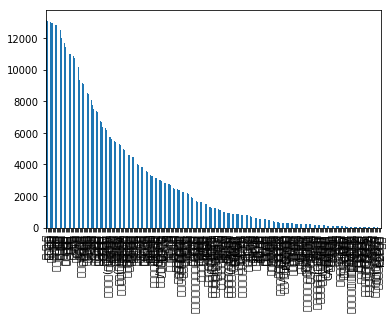

In [113]:
print(max(count3), min(count3))
count3.plot(kind = 'bar')

In [114]:
mon_max_03 = []
mon_max_03_idx = []
mon_min_03 = []
mon_min_03_idx = []

for i in range(0, 20):
    mon_max_03.append(count3[i])
    mon_max_03_idx.append(count3.index[i])
    mon_min_03.append(count3[-(i+1)])
    mon_min_03_idx.append(count3.index[-(i+1)])

    
print(mon_max_03, "\n", mon_max_03_idx)
print(mon_min_03, "\n", mon_min_03_idx)

print('\n\n')

mon_min_03.reverse(), mon_min_03_idx.reverse()
mon_03 = mon_max_03 + mon_min_03
mon_03_idx = mon_max_03_idx + mon_min_03_idx

print(mon_03,'\n', mon_03_idx)

[13132, 13118, 13101, 13063, 13000, 12984, 12876, 12824, 12818, 12607, 12563, 12524, 12030, 11873, 11708, 11480, 11400, 11031, 10988, 10984] 
 ['편 의 점', '서양음식', '일반한식', '스넥', '슈퍼 마켓', '미 용 원', '제과점', '기타음료식품', '약국', '주점', '중국음식', '정 육 점', '일식회집', '의원', '농축수산품', '기타레져업', '한의원', '세탁소', '당구장', '치과의원']
[2, 3, 4, 4, 5, 8, 9, 10, 16, 17, 20, 21, 25, 29, 33, 39, 45, 47, 48, 50] 
 ['P2P송금', '교육테이프', '통신기기무이자할부', '외국인전용가맹점', '통신판매(생활서비스)', '총포류판매', '스 키 장', '콘   도', '조산원', '기타회원제형태업소2', '골동품 점', '기타비영리유통', '기타회원제형태업소5', '중장비수리', '위성방송', '사업자미등록개인', '자체물품대금', '피아노대리점', '기타 운송', '통신판매2']



[13132, 13118, 13101, 13063, 13000, 12984, 12876, 12824, 12818, 12607, 12563, 12524, 12030, 11873, 11708, 11480, 11400, 11031, 10988, 10984, 50, 48, 47, 45, 39, 33, 29, 25, 21, 20, 17, 16, 10, 9, 8, 5, 4, 4, 3, 2] 
 ['편 의 점', '서양음식', '일반한식', '스넥', '슈퍼 마켓', '미 용 원', '제과점', '기타음료식품', '약국', '주점', '중국음식', '정 육 점', '일식회집', '의원', '농축수산품', '기타레져업', '한의원', '세탁소', '당구장', '치과의원', '통신판매2', '기타 운송', '피아노대리점', '자체물품대금', '사

      Name  Count
0    편 의 점  13132
1     서양음식  13118
2     일반한식  13101
3       스넥  13063
4    슈퍼 마켓  13000
5    미 용 원  12984
6      제과점  12876
7   기타음료식품  12824
8       약국  12818
9       주점  12607
10    중국음식  12563
11   정 육 점  12524
12    일식회집  12030
13      의원  11873
14   농축수산품  11708
15   기타레져업  11480
16     한의원  11400
17     세탁소  11031
18     당구장  10988
19    치과의원  10984


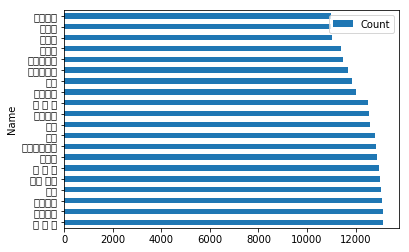

           Name  Count
0         통신판매2     50
1         기타 운송     48
2        피아노대리점     47
3        자체물품대금     45
4      사업자미등록개인     39
5          위성방송     33
6         중장비수리     29
7    기타회원제형태업소5     25
8       기타비영리유통     21
9         골동품 점     20
10   기타회원제형태업소2     17
11          조산원     16
12        콘   도     10
13        스 키 장      9
14        총포류판매      8
15  통신판매(생활서비스)      5
16     외국인전용가맹점      4
17    통신기기무이자할부      4
18        교육테이프      3
19        P2P송금      2


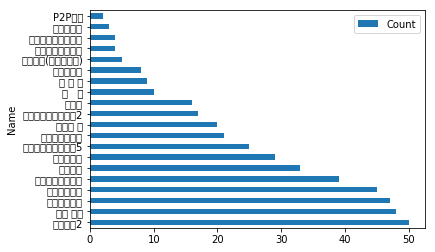

In [115]:
data03_max ={ "Name" : mon_max_03_idx, "Count" : mon_max_03 }
df_data03_max = pd.DataFrame(data03_max)
print(df_data03_max)
df_data03_max.plot(x = "Name", y = "Count", kind = 'barh')
plt.show()

data03_min = { "Name" : mon_min_03_idx, "Count" : mon_min_03 }
df_data03_min = pd.DataFrame(data03_min)
print(df_data03_min)
df_data03_min.plot(x = "Name", y = "Count", kind = 'barh')
plt.show()

#### 5월

In [85]:
count5 = card_05['mrhst_induty_cl_nm'].value_counts()
count5.sort_values()
print(count5)

서양음식              13161
편 의 점             13147
일반한식              13135
스넥                13105
미 용 원             13052
슈퍼 마켓             13041
기타음료식품            12941
제과점               12925
약국                12849
중국음식              12686
주점                12635
정 육 점             12545
일식회집              12086
의원                11909
농축수산품             11901
정장                11862
기타레져업             11649
한의원               11497
세탁소               11495
화   원             11395
안경                11294
화 장 품             11065
당구장               11050
노래방               10901
치과의원              10815
문구용 품             10639
스포츠레져용품           10215
기타잡화               9879
자동차정비              9688
사무서비스              9501
                  ...  
종합레져타운               74
CATV                 72
통신판매(일반)             68
통신서비스                68
기타농업관련               67
전자상거래 상품권            64
통신판매2                62
통신서비스/비대상            61
유학원                  61
피아노대리점               59
철   도           

13161 1


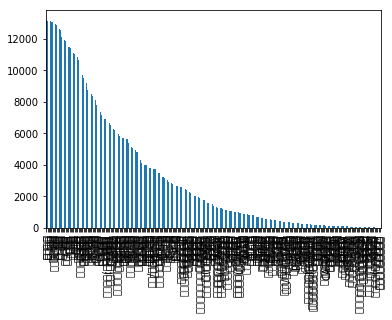

In [106]:
print(max(count5), min(count5))
count5.plot(kind = 'bar')

In [96]:
mon_max_05 = []
mon_max_05_idx = []
mon_min_05 = []
mon_min_05_idx = []

for i in range(0, 20):
    mon_max_05.append(count5[i])
    mon_max_05_idx.append(count5.index[i])
    mon_min_05.append(count5[-(i+1)])
    mon_min_05_idx.append(count5.index[-(i+1)])

    
print(mon_max_05, "\n", mon_max_05_idx)
print(mon_min_05, "\n", mon_min_05_idx)

print('\n\n')

mon_min_05.reverse(), mon_min_05_idx.reverse()
mon_05 = mon_max_05 + mon_min_05
mon_05_idx = mon_max_05_idx + mon_min_05_idx

print(mon_05,'\n', mon_05_idx)

[13161, 13147, 13135, 13105, 13052, 13041, 12941, 12925, 12849, 12686, 12635, 12545, 12086, 11909, 11901, 11862, 11649, 11497, 11495, 11395] 
 ['서양음식', '편 의 점', '일반한식', '스넥', '미 용 원', '슈퍼 마켓', '기타음료식품', '제과점', '약국', '중국음식', '주점', '정 육 점', '일식회집', '의원', '농축수산품', '정장', '기타레져업', '한의원', '세탁소', '화   원']
[1, 1, 2, 2, 4, 12, 14, 20, 23, 24, 29, 32, 34, 37, 40, 41, 46, 48, 49, 55] 
 ['중고자동차위탁판매', '통신기기무이자할부', '총포류판매', '교육테이프', '통신판매(생활서비스)', '콘   도', '조산원', '스 키 장', '기타비영리유통', '기타회원제형태업소5', '중장비수리', '위성방송', '골동품 점', '사업자미등록개인', '자체물품대금', '기타회원제형태업소2', '전자상거래 상품권 전문판매', '기타 운송', '유치원', '철   도']



[13161, 13147, 13135, 13105, 13052, 13041, 12941, 12925, 12849, 12686, 12635, 12545, 12086, 11909, 11901, 11862, 11649, 11497, 11495, 11395, 55, 49, 48, 46, 41, 40, 37, 34, 32, 29, 24, 23, 20, 14, 12, 4, 2, 2, 1, 1] 
 ['서양음식', '편 의 점', '일반한식', '스넥', '미 용 원', '슈퍼 마켓', '기타음료식품', '제과점', '약국', '중국음식', '주점', '정 육 점', '일식회집', '의원', '농축수산품', '정장', '기타레져업', '한의원', '세탁소', '화   원', '철   도', '유치원', '기타 운송', '전자상

      Name  Count
0     서양음식  13161
1    편 의 점  13147
2     일반한식  13135
3       스넥  13105
4    미 용 원  13052
5    슈퍼 마켓  13041
6   기타음료식품  12941
7      제과점  12925
8       약국  12849
9     중국음식  12686
10      주점  12635
11   정 육 점  12545
12    일식회집  12086
13      의원  11909
14   농축수산품  11901
15      정장  11862
16   기타레져업  11649
17     한의원  11497
18     세탁소  11495
19   화   원  11395


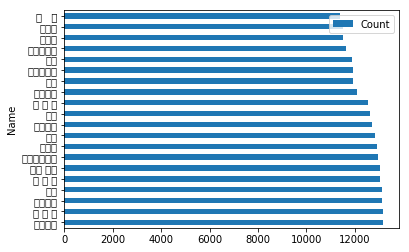

              Name  Count
0            철   도     55
1              유치원     49
2            기타 운송     48
3   전자상거래 상품권 전문판매     46
4       기타회원제형태업소2     41
5           자체물품대금     40
6         사업자미등록개인     37
7            골동품 점     34
8             위성방송     32
9            중장비수리     29
10      기타회원제형태업소5     24
11         기타비영리유통     23
12           스 키 장     20
13             조산원     14
14           콘   도     12
15     통신판매(생활서비스)      4
16           교육테이프      2
17           총포류판매      2
18       통신기기무이자할부      1
19       중고자동차위탁판매      1


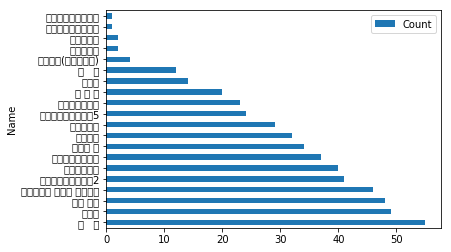

In [97]:
data05_max ={ "Name" : mon_max_05_idx, "Count" : mon_max_05 }
df_data05_max = pd.DataFrame(data05_max)
print(df_data05_max)
df_data05_max.plot(x = "Name", y = "Count", kind = 'barh')
plt.show()

data05_min = { "Name" : mon_min_05_idx, "Count" : mon_min_05 }
df_data05_min = pd.DataFrame(data05_min)
print(df_data05_min)
df_data05_min.plot(x = "Name", y = "Count", kind = 'barh')
plt.show()

### 1월과 5월 비교

In [103]:
df_data0105_max = pd.merge(df_data01_max, df_data05_max, how = "outer", right_index = True, left_index = True)
df_data0105_max

,Name_x,Count_x,Name_y,Count_y
0,일반한식,11771,서양음식,13161
1,서양음식,11647,편 의 점,13147
2,스넥,11391,일반한식,13135
3,편 의 점,11314,스넥,13105
4,미 용 원,10773,미 용 원,13052
5,슈퍼 마켓,10215,슈퍼 마켓,13041
6,주점,9970,기타음료식품,12941
7,제과점,9814,제과점,12925
8,약국,9604,약국,12849
9,기타음료식품,9577,중국음식,12686


In [104]:
df_data0105_min = pd.merge(df_data01_min, df_data05_min, how = "outer", right_index = True, left_index = True)
df_data0105_min

,Name_x,Count_x,Name_y,Count_y
0,비씨카드정산용(할인),14,철 도,55
1,자체물품대금,14,유치원,49
2,외국인전용가맹점,14,기타 운송,48
3,사업자미등록개인,14,전자상거래 상품권 전문판매,46
4,통신판매2,13,기타회원제형태업소2,41
5,기타농업관련,11,자체물품대금,40
6,위성방송,11,사업자미등록개인,37
7,기타회원제형태업소2,8,골동품 점,34
8,기타회원제형태업소5,8,위성방송,32
9,스 키 장,8,중장비수리,29


### 2월과 5월 비교

In [110]:
df_data0205_max = pd.merge(df_data02_max, df_data05_max, how = "outer", right_index = True, left_index = True)
df_data0205_max

,Name_x,Count_x,Name_y,Count_y
0,편 의 점,8897,서양음식,13161
1,서양음식,8891,편 의 점,13147
2,일반한식,8876,일반한식,13135
3,스넥,8846,스넥,13105
4,슈퍼 마켓,8823,미 용 원,13052
5,미 용 원,8772,슈퍼 마켓,13041
6,제과점,8718,기타음료식품,12941
7,기타음료식품,8693,제과점,12925
8,약국,8626,약국,12849
9,주점,8564,중국음식,12686


In [111]:
df_data0205_min = pd.merge(df_data02_min, df_data05_min, how = "outer", right_index = True, left_index = True)
df_data0205_min

,Name_x,Count_x,Name_y,Count_y
0,전자상거래 상품권 전문판매,38,철 도,55
1,철 도,37,유치원,49
2,사업자미등록개인,30,기타 운송,48
3,기타농업관련,29,전자상거래 상품권 전문판매,46
4,자체물품대금,27,기타회원제형태업소2,41
5,골동품 점,25,자체물품대금,40
6,기타 운송,24,사업자미등록개인,37
7,기타회원제형태업소2,22,골동품 점,34
8,위성방송,21,위성방송,32
9,중장비수리,20,중장비수리,29


### 3월 5월 비교

In [116]:
df_data0305_max = pd.merge(df_data03_max, df_data05_max, how = "outer", right_index = True, left_index = True)
df_data0305_max

,Name_x,Count_x,Name_y,Count_y
0,편 의 점,13132,서양음식,13161
1,서양음식,13118,편 의 점,13147
2,일반한식,13101,일반한식,13135
3,스넥,13063,스넥,13105
4,슈퍼 마켓,13000,미 용 원,13052
5,미 용 원,12984,슈퍼 마켓,13041
6,제과점,12876,기타음료식품,12941
7,기타음료식품,12824,제과점,12925
8,약국,12818,약국,12849
9,주점,12607,중국음식,12686


In [117]:
df_data0305_min = pd.merge(df_data03_min, df_data05_min, how = "outer", right_index = True, left_index = True)
df_data0305_min

,Name_x,Count_x,Name_y,Count_y
0,통신판매2,50,철 도,55
1,기타 운송,48,유치원,49
2,피아노대리점,47,기타 운송,48
3,자체물품대금,45,전자상거래 상품권 전문판매,46
4,사업자미등록개인,39,기타회원제형태업소2,41
5,위성방송,33,자체물품대금,40
6,중장비수리,29,사업자미등록개인,37
7,기타회원제형태업소5,25,골동품 점,34
8,기타비영리유통,21,위성방송,32
9,골동품 점,20,중장비수리,29


In [127]:
mean_count02 = []
mean_count03 = []
mean_count05 = []

for i in range(0, 20):
    mean_count02.append(df_data02_max['Count'][i]/29)
    mean_count03.append(df_data03_max['Count'][i]/31)
    mean_count05.append(df_data05_max['Count'][i]/31)


print(mean_count02, '\n\n', mean_count03, '\n\n', mean_count05)

[306.7931034482759, 306.58620689655174, 306.0689655172414, 305.0344827586207, 304.2413793103448, 302.48275862068965, 300.62068965517244, 299.7586206896552, 297.44827586206895, 295.3103448275862, 293.82758620689657, 292.2758620689655, 281.8965517241379, 281.7586206896552, 272.0344827586207, 271.9655172413793, 270.51724137931035, 263.13793103448273, 260.0344827586207, 259.2413793103448] 

 [423.61290322580646, 423.16129032258067, 422.61290322580646, 421.38709677419354, 419.35483870967744, 418.83870967741933, 415.35483870967744, 413.6774193548387, 413.48387096774195, 406.6774193548387, 405.258064516129, 404.0, 388.06451612903226, 383.0, 377.6774193548387, 370.3225806451613, 367.741935483871, 355.83870967741933, 354.4516129032258, 354.3225806451613] 

 [424.5483870967742, 424.0967741935484, 423.7096774193548, 422.741935483871, 421.03225806451616, 420.6774193548387, 417.4516129032258, 416.93548387096774, 414.48387096774195, 409.2258064516129, 407.5806451612903, 404.6774193548387, 389.870967

### 지역별 카드 사용량

In [140]:
count_area5 = card_05['adstrd_nm'].value_counts()
count_area5

신사동            5240
종로1.2.3.4가동    4531
역삼1동           4372
영등포동           3861
서교동            3721
여의동            3652
명동             3584
압구정동           3581
논현2동           3552
가산동            3525
서초3동           3492
논현1동           3471
한강로동           3399
삼성1동           3338
구로3동           3314
대치2동           3313
천호2동           3284
신정4동           3253
청담동            3240
문정2동           3227
용신동            3163
신촌동            3155
구의3동           3149
시흥1동           3137
반포4동           3136
대치4동           3108
회현동            3107
석촌동            3095
목1동            3093
양재2동           3091
               ... 
반포2동           1134
교남동            1132
가양3동           1122
쌍문4동           1110
응암2동           1090
신길4동           1072
사당5동           1052
청림동            1047
잠실4동           1032
수유3동           1031
난향동             973
무악동             965
숭인1동            939
효창동             930
시흥2동            903
응봉동             848
잠실7동            839
돈암1동            827
하계2동            790


In [174]:
card_name5 = card_05['mrhst_induty_cl_nm']
card_num5 = card_05['selng_cascnt']
card_area5 = card_05['adstrd_nm']

data_card5 = {"Area" : card_area5, "Name" : card_name5, "Num" : card_num5}
df_card5 = pd.DataFrame(data_card5)
df_card5

,Area,Name,Num
0,화곡2동,정 육 점,17
1,자양1동,스넥,188
2,문래동,주 차 장,63
3,신사동,서양음식,406
4,성수1가2동,주 차 장,37
5,자양3동,서양음식,786
6,수궁동,화 원,2
7,아현동,서양음식,721
8,성수1가1동,노래방,4
9,면목2동,일식회집,28


In [175]:
sum_num = 0
for i in range(0, 850301):
    if(df_card5['Name'][i] == '편 의 점'):
        sum_num = sum_num + int(df_card5['Num'][i])
sum_num

16111323

In [192]:
is_name = df_card5['Area'] == '화곡2동'
is_de = df_card5['Name'] == '편 의 점'
hwagok = df_card5[is_name & is_de]
hwagok = hwagok.astype({'Num' : int})
sum_num = sum(hwagok['Num'])
print(sum_num)
hwagok

13630


,Area,Name,Num
15673,화곡2동,편 의 점,299
41647,화곡2동,편 의 점,295
72193,화곡2동,편 의 점,265
88846,화곡2동,편 의 점,266
97029,화곡2동,편 의 점,1048
134734,화곡2동,편 의 점,271
153205,화곡2동,편 의 점,570
196783,화곡2동,편 의 점,476
226840,화곡2동,편 의 점,457
241308,화곡2동,편 의 점,302


https://hogni.tistory.com/9

In [9]:
adstrd=pd.read_csv('adstrd_master.csv')
adstrd['adstrd_code']=adstrd['adstrd_code'].astype(str)
adstrd['exp']=adstrd['adstrd_code'].apply(lambda x:x[:5])
adstrd['total_adstrd']=adstrd['brtc_nm']+' '+adstrd['signgu_nm']

adstrd_name=adstrd[['exp','total_adstrd']]
adstrd_name=adstrd_name.drop_duplicates(['exp'],keep='first')
adstrd_name=adstrd_name.reset_index()
adstrd_name=adstrd_name.drop(['index'],axis=1)
adstrd_name_seoul = adstrd_name[0:25]
adstrd_name_seoul

,exp,total_adstrd
0,11110,서울특별시 종로구
1,11140,서울특별시 중구
2,11170,서울특별시 용산구
3,11200,서울특별시 성동구
4,11215,서울특별시 광진구
5,11230,서울특별시 동대문구
6,11260,서울특별시 중랑구
7,11290,서울특별시 성북구
8,11305,서울특별시 강북구
9,11320,서울특별시 도봉구


In [18]:
is_date = card_05['receipt_dttm'] == 20200501
# is_code = card_05['adstrd_code'] == 11110 # 10자리 중 앞의 5자리 필요
is_name = card_05['mrhst_induty_cl_nm'] == '편 의 점' # mrhst_induty_cl_code 를 지정하는 것으로 변경 가능

seoul = card_05[is_date & is_name]
seoul = seoul.astype({'selng_cascnt' : int})
sum_num = sum(seoul['selng_cascnt'])
print(sum_num)
seoul

344581


,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
19,20200501,1156066000,신길4동,4010,편 의 점,198,1673520
80,20200501,1168065000,역삼2동,4010,편 의 점,1580,11700740
85,20200501,1165058100,반포4동,4010,편 의 점,4360,19657850
137,20200501,1165061000,방배2동,4010,편 의 점,793,19837130
169,20200501,1165062100,방배4동,4010,편 의 점,797,6071220
185,20200501,1117053000,남영동,4010,편 의 점,1350,8177750
214,20200501,1171064200,문정2동,4010,편 의 점,1981,12996820
254,20200501,1144065500,서강동,4010,편 의 점,1185,7112300
263,20200501,1171056100,방이1동,4010,편 의 점,415,2972490
274,20200501,1159067000,신대방1동,4010,편 의 점,321,2657350


In [37]:
receipt_dttm_05 = card_05['receipt_dttm']
adstrd_code_05 = card_05['adstrd_code']
adstrd_nm_05 = card_05['adstrd_nm']
mrhst_induty_cl_code_05 = card_05['mrhst_induty_cl_code']
mrhst_induty_cl_nm_05 = card_05['mrhst_induty_cl_nm']
selng_cascnt_05 = card_05['selng_cascnt']
salamt_05 = card_05['salamt']

adstrd_code_05_new = []

for i in adstrd_code_05:
    adstrd_code_05_new.append(int(i/100000))

adstrd_code_05_new

data_card05 = {"receipt_dttm" : receipt_dttm_05, "adstrd_code" : adstrd_code_05_new, "adstrd_nm" : adstrd_nm_05, "mrhst_induty_cl_code": mrhst_induty_cl_code_05,
               "mrhst_induty_cl_nm" : mrhst_induty_cl_nm_05, "selng_cascnt" : selng_cascnt_05, "salamt" : salamt_05}
df_card05 = pd.DataFrame(data_card05)
df_card05

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200501,11500,화곡2동,8302,정 육 점,17,481200
1,20200501,11215,자양1동,8021,스넥,188,2777400
2,20200501,11560,문래동,6140,주 차 장,63,375000
3,20200501,11620,신사동,8006,서양음식,406,3421500
4,20200501,11200,성수1가2동,6140,주 차 장,37,259500
5,20200501,11215,자양3동,8006,서양음식,786,10125220
6,20200501,11530,수궁동,2230,화 원,2,43000
7,20200501,11440,아현동,8006,서양음식,721,8567040
8,20200501,11200,성수1가1동,2130,노래방,4,576000
9,20200501,11260,면목2동,8004,일식회집,28,1956500


In [40]:
is_date = df_card05['receipt_dttm'] == 20200501
is_code = df_card05['adstrd_code'] == 11110 # 10자리 중 앞의 5자리 필요
is_name = df_card05['mrhst_induty_cl_nm'] == '편 의 점' # mrhst_induty_cl_code 를 지정하는 것으로 변경 가능

jongro = df_card05[is_date & is_code & is_name]
jongro = jongro.astype({'selng_cascnt' : int})
sum_num = sum(jongro['selng_cascnt'])
print(sum_num)
jongro

10780


,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
2254,20200501,11110,창신3동,4010,편 의 점,15,51880
3796,20200501,11110,창신1동,4010,편 의 점,351,2775080
6365,20200501,11110,무악동,4010,편 의 점,284,1665790
6666,20200501,11110,청운효자동,4010,편 의 점,340,1992370
7686,20200501,11110,사직동,4010,편 의 점,780,3975870
7933,20200501,11110,교남동,4010,편 의 점,210,1925530
9230,20200501,11110,숭인2동,4010,편 의 점,861,4947880
10017,20200501,11110,가회동,4010,편 의 점,200,1377810
10059,20200501,11110,창신2동,4010,편 의 점,156,1125500
10616,20200501,11110,종로1.2.3.4가동,4010,편 의 점,3849,25117970
